### Introduction

I will be analysing a dataset containing samples of body measurements from both males and females. Through careful analysis and visualization, I aim to compare the characteristics between genders and draw meaningful insights from the data. By exploring various body measurements, we can uncover valuable information and potentially uncover differences or similarities between males and females. Through this analysis, we hope to gain a deeper understanding of the dataset and extract meaningful results.

### data description
1. weight (kg)
2. standing height (cm)
3. upper arm length (cm)
4. upper leg length (cm)
5. arm circumferance (cm)
6. hip circumferance (cm)
7. waist circumferance (cm)
8. BMI

In [1]:
# import necessary tools for data analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load csv files for male and female

male = pd.read_csv('nhanes_adult_male_bmx_2020.csv', comment="#")
female = pd.read_csv('nhanes_adult_female_bmx_2020.csv', comment="#")
male = male.to_numpy()
female = female.to_numpy()

In [3]:
# add BMI for each gender as 8th column

male_BMI = male[:, 0] / ((male[:, 1]/100)** 2)
male_v2 = np.insert(male, 7, male_BMI, axis=1)
female_BMI = female[:, 0] / ((female[:, 1]/100)** 2)
female_v2 = np.insert(female, 7, female_BMI, axis=1)

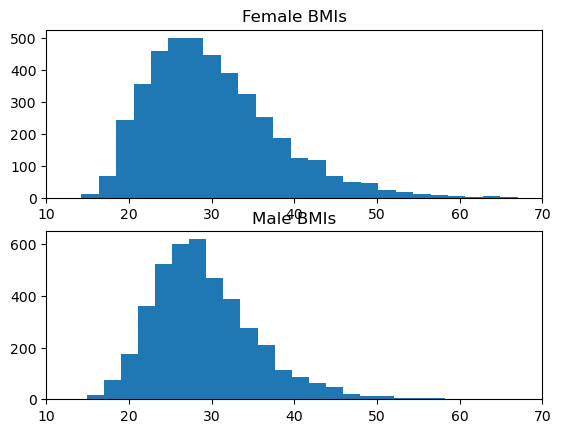

In [4]:
## draw 2 histograms for each gender's BMI

female_BMI = female_v2[:,7:]
male_BMI = male_v2[:,7:]
fig, axs = plt.subplots(2, 1, sharex=False, gridspec_kw={'hspace': 0.2})
axs[0].hist(female_BMI, bins=25)
axs[1].hist(male_BMI, bins=25)
axs[0].set(title = 'Female BMIs', xlim=(10,70))
axs[1].set(title = 'Male BMIs', xlim=(10,70))
plt.show()

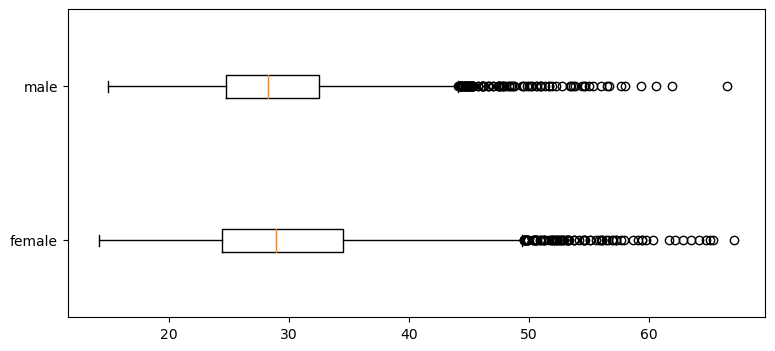

In [5]:
## 5. boxplots for female_BMI and male_BMI

import matplotlib.pyplot as plt

flattened_female_BMI = female_BMI.flatten()
flattened_male_BMI = male_BMI.flatten()
boxplot_BMI = [female_BMI.flatten(), male_BMI.flatten()]
fig, ax = plt.subplots(figsize=(9, 4))
ax.boxplot(boxplot_BMI, vert=False)

ax.set_yticks([1, 2])
ax.set_yticklabels(['female', 'male'])

plt.show()


In [6]:
## 6. numerical aggregates of the male and female BMIs

## male BMI aggregates

from scipy.stats import skew

print("Male BMI mean", round(np.mean(male_BMI),2),
"median", round(np.median(male_BMI),2),
"std", round(np.std(male_BMI),2),
"Max", round(np.max(male_BMI),2),
"Min", round(np.min(male_BMI),2),
"IQR", round(np.percentile(male_BMI, 75) - np.percentile(male_BMI, 25),2),
"skew", skew(male_BMI)      
     )

Male BMI mean 29.14 median 28.27 std 6.31 Max 66.5 Min 14.91 IQR 7.73 skew [0.97002389]


In [7]:
## female BMI aggregates

print("Female BMI mean", round(np.mean(female_BMI),2),
"median", round(np.median(female_BMI),2),
"std", round(np.std(female_BMI),2),
"Max", round(np.max(female_BMI),2),
"Min", round(np.min(female_BMI),2),
"IQR", round(np.percentile(female_BMI, 75) - np.percentile(female_BMI, 25),2),
"skew", skew(female_BMI)    ) 

Female BMI mean 30.1 median 28.89 std 7.76 Max 67.04 Min 14.2 IQR 10.01 skew [0.91833939]


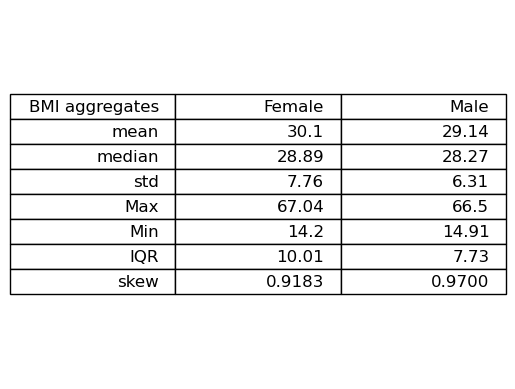

In [8]:
## visualised in a table

agg = [
    ['BMI aggregates', 'Female', 'Male'],
    ['mean', '30.1', '29.14'],
    ['median', '28.89', '28.27'],
    ['std', '7.76', '6.31'],
    ['Max', '67.04', '66.5'],
    ['Min', '14.2', '14.91'],
    ['IQR', '10.01', '7.73'],
    ['skew', '0.9183', '0.9700']
]

fig, ax = plt.subplots()

table = ax.table(cellText=agg, loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)  # Adjust table scaling

ax.axis('off')

plt.show()

## 7. description of two distinctions.

In general, the male and female BMI aggregates follow a similar trend with no distinctive differences. 
Both genders have comparable median and mean values, indicating a similar central tendency. 
the distributions for both male and female BMI are positively skewed, as evidenced by their skewness values 
close to 1. This indicates a tendency for more lower values and fewer higher values in both datasets. 
The female BMI data shows slightly higher dispersion, as reflected by slightly higher variance 
and standard deviation values, suggesting that the data points are slightly more spread out compared to 
the male BMI distribution. It's important to consider additional statistical measures and the specific 
context to gain a comprehensive understanding of the data characteristics.

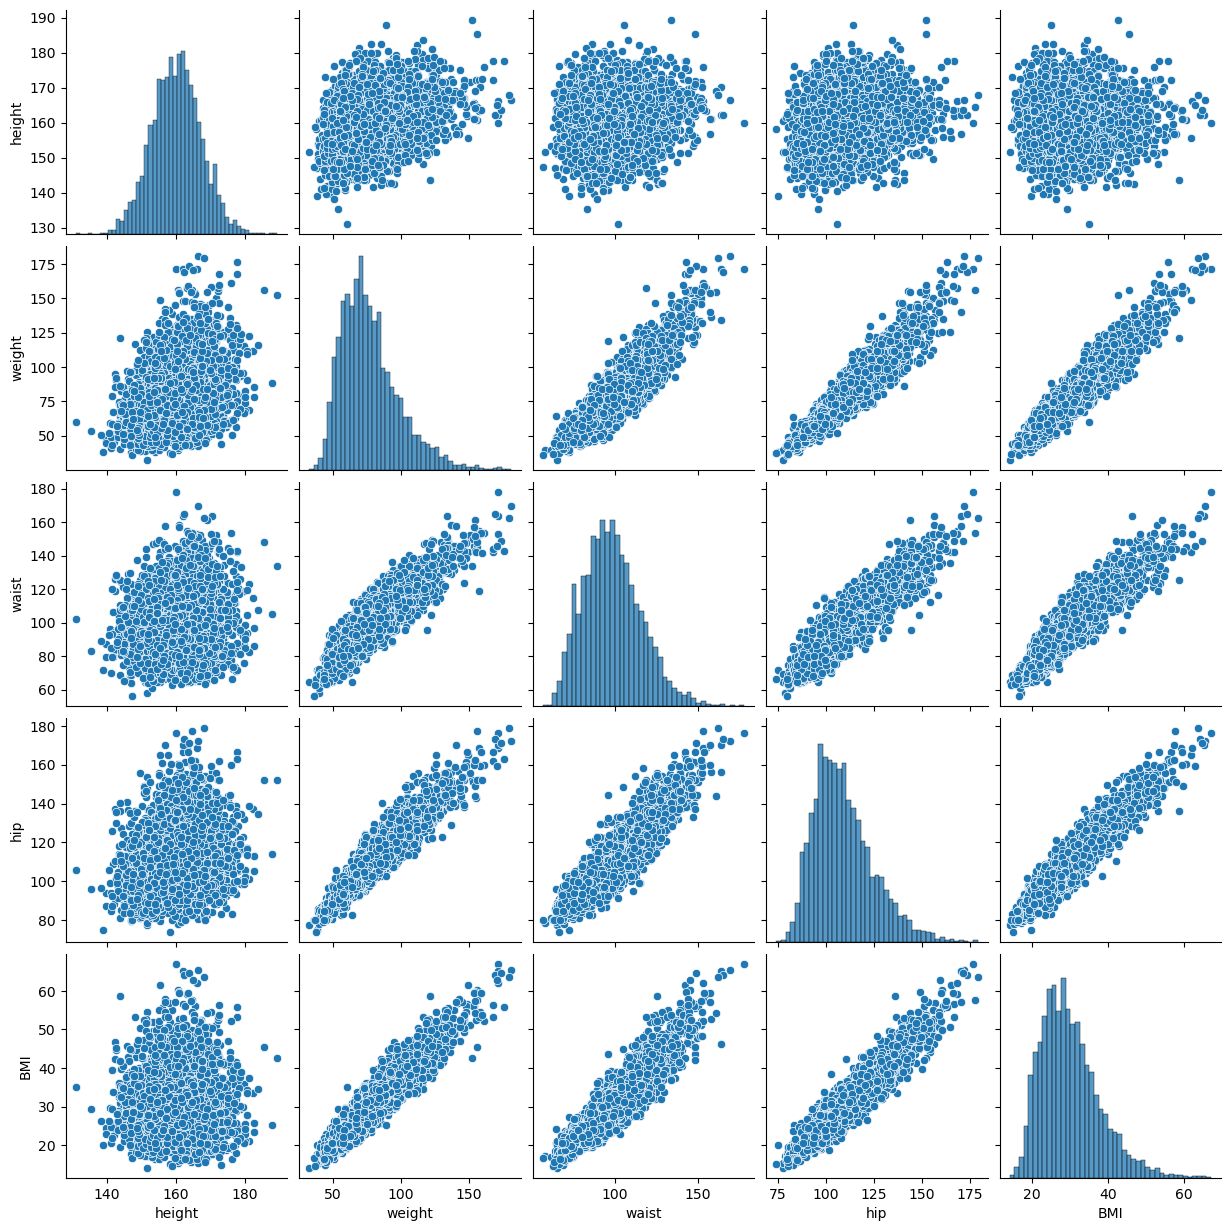

In [9]:
## 8. scatterplot

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.pairplot(data = pd.DataFrame(
    female_v2[:, [1, 0, 6, 5, 7]], 
columns = ['height', 'weight', 'waist', 'hip', 'BMI'], ))


plt.show()
         
        


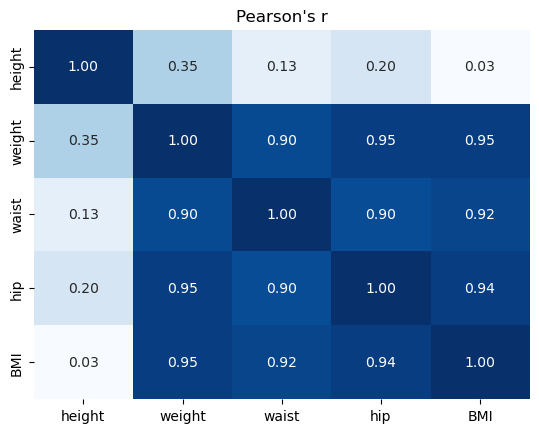

In [10]:
## Pearson's r for female 

order =[1, 0, 6, 5, 7]
cols = ["height", "weight", "waist", "hip", "BMI"]
female_corr = female_v2[:, order]

C = np.corrcoef(female_corr.T)
sns.heatmap(
    C,
    xticklabels=cols,
    yticklabels=cols,
    annot=True, fmt=".2f", cmap="Blues", cbar=False
)
plt.title("Pearson's r")
plt.show()


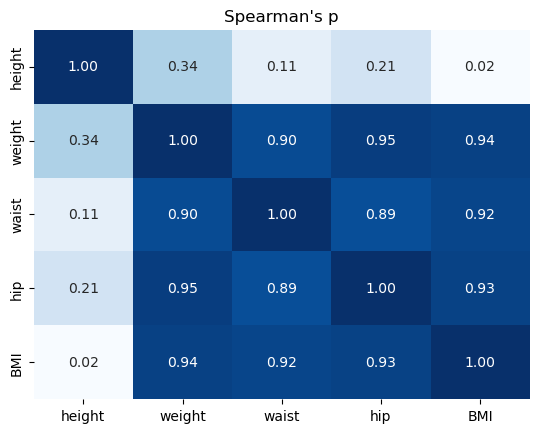

In [11]:
## Spearman's p for female 

import seaborn as sns
from scipy.stats import spearmanr

order =[1, 0, 6, 5, 7]
cols = ["height", "weight", "waist", "hip", "BMI"]
female_corr = female_v2[:, order]

D, _= spearmanr(female_corr)
sns.heatmap(
D,
xticklabels=cols,
yticklabels=cols,
annot=True, fmt=".2f", cmap="Blues", cbar=False
)
plt.title("Spearman's p")
plt.show()



## 10. Discuss the findings from subtasks 8 and 9.

The analysis conducted in subtasks 8 and 9 reveals interesting patterns among the variables weight, waist, hip, BMI, and 
height. The factors weight, waist, hip, and BMI exhibit positive correlations with each other, indicating that as 
one variable increases, the others also tend to increase. This positive relationship is evident in both Pearson's correlation 
coefficient and Spearman's rank correlation coefficient. However, height does not display a significant correlation or 
monotonic relationship with any of the other four factors. These findings suggest that while weight, waist, hip, and BMI 
are interrelated, height does not share the same relationship with these factors.

In [12]:
## Additional Tasks for SIT731 student

import numpy as np
from scipy.stats import zscore

zfemale = zscore(female_v2, axis=0)

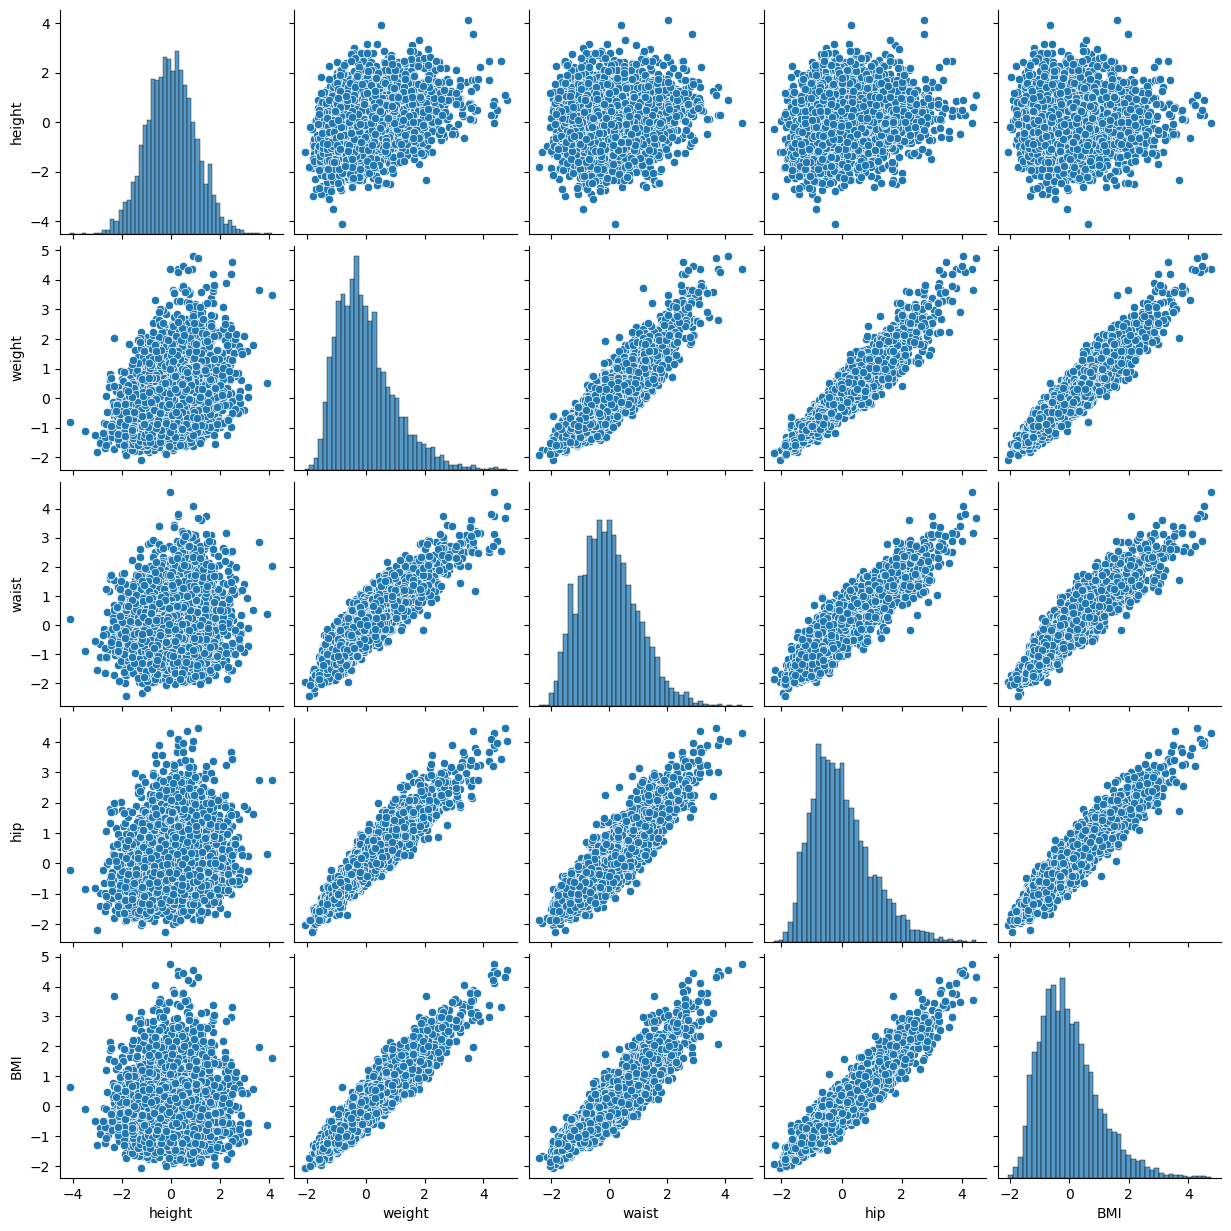

In [13]:
## scatterplot for zfemale

sns.pairplot(data = pd.DataFrame(
    zfemale[:, [1, 0, 6, 5, 7]], 
columns = ['height', 'weight', 'waist', 'hip', 'BMI'], ))


plt.show()

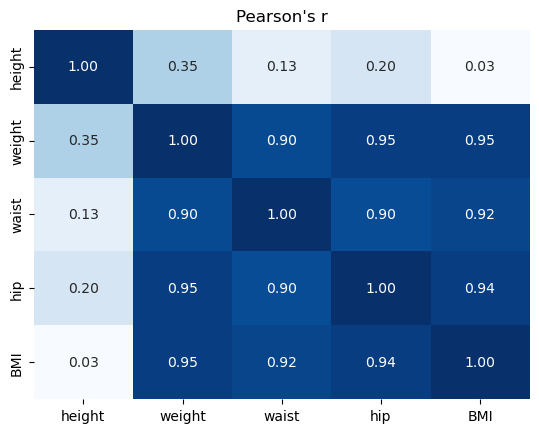

In [14]:
## Pearson's r for zfemale 

order =[1, 0, 6, 5, 7]
cols = ["height", "weight", "waist", "hip", "BMI"]
female_corr = zfemale[:, order]

C = np.corrcoef(female_corr.T)
sns.heatmap(
    C,
    xticklabels=cols,
    yticklabels=cols,
    annot=True, fmt=".2f", cmap="Blues", cbar=False
)
plt.title("Pearson's r")
plt.show()
 

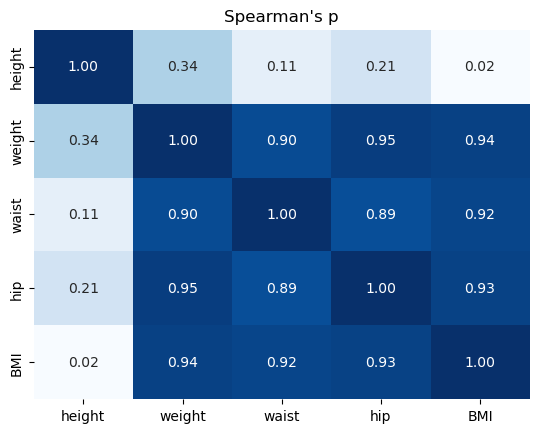

In [15]:
## Spearman's p for zfemale 

import seaborn as sns
from scipy.stats import spearmanr

order =[1, 0, 6, 5, 7]
cols = ["height", "weight", "waist", "hip", "BMI"]
female_corr = zfemale[:, order]

D, _= spearmanr(female_corr)
sns.heatmap(
D,
xticklabels=cols,
yticklabels=cols,
annot=True, fmt=".2f", cmap="Blues", cbar=False
)
plt.title("Spearman's p")
plt.show()


## conclusion

In conclusion, after conducting a thorough data analysis on the dataset of body measurements for both 
genders, several key findings have emerged. Firstly, the analysis revealed that both males and females 
exhibited similar trends in BMI, as evidenced by the aggregation of data measures such as mean and median. 
However, when examining the correlations between different factors, it became evident that weight, waist 
circumference, hip circumference, and BMI demonstrated strong positive relationships with each other. 
Conversely, height did not exhibit significant correlations with these four factors. These findings shed 
light on the interplay between body measurements and highlight the importance of weight-related factors 
in understanding body composition. Further research and exploration of these relationships could provide 
valuable insights into gender differences and their implications for health and well-being.